# 2.18 Programming for Geoscientists class test - example paper based on 2012 2.18 exam

#Test instructions

* This test contains **5** questions each of which should be answered.
* Write your program in a Python cell just under each question.
* You can write an explanation of your solution as comments in your code.
* In each case your solution program must fulfil all of the instructions - please check the instructions carefully and double check that your program fulfils all of the given instructions.
* Save your work regularly.
* At the end of the test you should email your IPython notebook document (i.e. this document) to [Gerard J. Gorman](http://www.imperial.ac.uk/people/g.gorman) at g.gorman@imperial.ac.uk

**1.** Ignore this question from 2012 as it deals with material we have not discussed this year.

**2.** Write a program, that creates a *list* $t$ with 6 values, 0.1, 0.2, ..., 0.6. Compute a corresponding *list* $y$ of $y(t)$ values using the formula:
$$y(t) = v_0t − gt^2,$$
where $v_0=6.0$ and $g=9.8$.

* Store these two lists, t and y, in a new list t1.
* Write out a table with a column of t and a column of y values by traversing the data in the nested t1 list.
* You may use list or NumPy array for t and y.
* Print out a table header with the column names ’t’ and ’y’.
* For printing the table, iterate the nested list t1, do not access the previously computed t and y lists directly.
* Print out the table t1 using format specifiers so that the columns are aligned.

In [1]:
t = [0.1*i for i in range(1, 7)]
v0 = 6.0
g = 9.8
y = [v0*ti-g*ti**2 for ti in t]
t1 = []
for ti, yi in zip(t, y):
    t1.append([ti, yi])
    
print "%8s%8s"%("t", "y")
for pair in t1:
        print "%8g%8g"%(pair[0], pair[1])

       t       y
     0.1   0.502
     0.2   0.808
     0.3   0.918
     0.4   0.832
     0.5    0.55
     0.6   0.072


**3.** The factorial of n, written as n!, is defined as:
$$n! = n(n − 1)(n − 2)...2\cdot1,$$
with the special cases
$$1! = 1, 0! = 1.$$
For example, $4! = 4\cdot3\cdot2\cdot1 = 24$, and $2! = 2\cdot1 = 2$.

* Write a function fact(n) that returns $n!$. You **must** not use the *fact* function from the math module.
* Return 1 immediately if $x$ is 1 or 0, otherwise use a loop to compute $n!$.
* The function must be called *fact* and take a single argument called n.
* The software should check that the supplied value is a non-negative integer. If it is not, raise a ValueError exception.

In [2]:
def fact(n):
    if type(n) != int:
        raise ValueError("value must be of type int")
    if n < 0:
        raise ValueError("value must be positive")
    if n<2:
            return 1
    product = 1
    for i in range(1, n+1):
        product *= i
    return product

# Let's show that it works
for i in range(5):
    print "%d! = %d"%(i, fact(i))


0! = 1
1! = 1
2! = 2
3! = 6
4! = 24


**4.** A table of temperatures and densities, in units of degrees ($C$) and $kg/m^3$, are given in the file *data/density\_air.dat*
Write a program that reads in the data from file into a list for temperature (first column) and density (second column) and plots the variation of density against temperature.

* The input file contains blank lines and lines starting with a ’#’, which you must ignore when reading in the data.
* You may use list or NumPy array for temperature and density.
* Plot the variation of density against temperature.
* Label the x axis "Temperature (Celsius)" and the y axis "Density ($kg/m^3$)".
* Use the plot title "Density of air at different temperatures, at 1 atm pressure".
* Display a legend with the label ’Air’.

Populating the interactive namespace from numpy and matplotlib


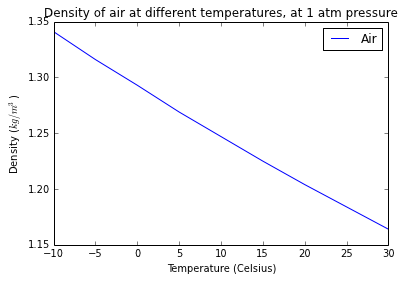

In [3]:
%pylab inline
from pylab import *

file = open("data/density_air.dat")
tlist = []
dlist = []
for line in file:
    words = line.split()
    if len(words) != 2:
        continue
    try:
        t = float(words[0])
        d = float(words[1])
    except:
        continue
    tlist.append(t)
    dlist.append(d)
tarray = array(tlist)
darray = array(dlist)

plot(tarray, darray)
xlabel("Temperature (Celsius)")
ylabel("Density ($kg/m^3$)")
title("Density of air at different temperatures, at 1 atm pressure")
legend(("Air", ))

**5.** Based on the data in the file *data/constants.txt*, make a dictionary where the keys are the names of the physical constant and the values are a tuple containing the numerical value and the units.

* Use a Python dictionary to store the data.
* All numerical values should be of type float.
* Print out the dictionary without any formatting.

In [4]:
file = open("data/constants.txt", "r")
constants = {}
for line in file:
    try:
        name = line[0:27].strip()
        
        words = line[27:].split()
        value = float(words[0])
        units = words[1]
    except:
        continue
    
    constants[name] = (value, units)

print constants

{'Planck constant': (6.6260755e-34, 'J*s'), 'elementary charge': (1.60217733e-19, 'C'), 'speed of light': (299792458.0, 'm/s'), 'electron mass': (9.1093897e-31, 'kg'), 'Avogadro number': (6.0221367e+23, '1/mol'), 'proton mass': (1.6726231e-27, 'kg'), 'gravitational constant': (6.67259e-11, 'm**3/kg/s**2'), 'Boltzmann constant': (1.380658e-23, 'J/K')}
